## Scraping Spotify Data

In [1]:
# Importing Packages
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import re

In [2]:
# Spotify API Info
album_uri = "3lS1y25WAhcqJDATJK70Mq"
client_id= "7037a3fd05ed4937bb639e43ecb77ed2" # ava's id
client_secret= "11282481d4c841839870004e083fc9a6" # ava's secret

# Spotipy Objects
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
tracks = sp.album_tracks(album_uri) #album_uri

# Constant Variables
album = "Midnights (3am Edition)"
artist = "Taylor Swift"
release_date = "2022-10-21"
album_size = len(tracks['items'])

# Track Data dictionary
track_data = {"name": [], "album": [album]*album_size, "artist": [artist]*album_size, "release_date":[release_date]*album_size, "length": [],"popularity": [], "danceability": [], "acousticness": [], "energy": [], "instrumentalness": [], "liveness": [], "loudness": [], "speechiness": [], "valence": [], "tempo": []}

In [3]:
#Function to add a feature and its value to track_data
def add_data(feature, value):
    if len(track_data[feature]) == 0:
        track_data[feature] = [value]
    else:
        track_data[feature].append(value)

In [4]:
# Iterate through each song in the album, add info to track_data
for n in range(album_size):
    id = tracks['items'][n]['id']
    features = sp.audio_features(id)
    add_data("name",tracks['items'][n]['name'])
    add_data("length", tracks['items'][n]['duration_ms'])
    add_data("popularity", (sp.track(id))['popularity'])
    features = (sp.audio_features(id))[0]
    for feature in features:
        if feature in track_data.keys(): # if relevant feature
            add_data(feature, features[feature])

In [5]:
midnight_spot = pd.DataFrame.from_dict(track_data)
# Saving the midnight spotify data so we don't have to scrape again
midnight_spot.to_csv('data/spotify_midnights.csv', index = True)

In [6]:
# merge midnights with all the other albums
other_albums = pd.read_csv('data/spotify_taylorswift.csv', index_col = 0)
spotify = pd.concat([other_albums, midnight_spot])
spotify = spotify.reset_index()
spotify = spotify.drop(['index'],axis=1)
spotify

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009
1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.000000,0.1190,-6.941,0.0231,0.289,99.953
3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028
4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.000000,0.1230,-5.769,0.0266,0.261,175.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Paris,Midnights (3am Edition),Taylor Swift,2022-10-21,196258,85,0.700,0.112,0.509,0.000033,0.1370,-10.547,0.0789,0.345,110.947
187,High Infidelity,Midnights (3am Edition),Taylor Swift,2022-10-21,231475,84,0.646,0.723,0.529,0.000000,0.0885,-10.179,0.0864,0.755,87.862
188,Glitch,Midnights (3am Edition),Taylor Swift,2022-10-21,148781,83,0.675,0.361,0.466,0.000000,0.1100,-9.738,0.2010,0.347,140.864
189,"Would've, Could've, Should've",Midnights (3am Edition),Taylor Swift,2022-10-21,260361,87,0.483,0.430,0.840,0.000575,0.1460,-6.508,0.1190,0.550,157.979


In [7]:
remove = []
for i, song in enumerate(spotify['name']):
    if '-' in song:
        remove.append(i)
    # removing parentheses, brackets, & dashes, converting to lower case, removing weird symbols and leftover spaces
    spotify.loc[i, 'name'] = re.sub("\(.+\)|\[.+\]",'', song).lower().replace('\u200b','').strip()
    spotify.loc[i, 'name'] = re.sub('’','\'',spotify.loc[i, 'name']) # replacing ’ with '
        
spotify = spotify.drop(spotify.index[remove])

In [8]:
spotify

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,tim mcgraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.57500,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009
1,picture to burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.17300,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586
3,a place in this world,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.05100,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028
4,cold as you,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.21700,0.482,0.000000,0.1230,-5.769,0.0266,0.261,175.558
5,the outside,Taylor Swift,Taylor Swift,2006-10-24,207106,47,0.589,0.00491,0.805,0.000000,0.2400,-4.055,0.0293,0.591,112.982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,paris,Midnights (3am Edition),Taylor Swift,2022-10-21,196258,85,0.700,0.11200,0.509,0.000033,0.1370,-10.547,0.0789,0.345,110.947
187,high infidelity,Midnights (3am Edition),Taylor Swift,2022-10-21,231475,84,0.646,0.72300,0.529,0.000000,0.0885,-10.179,0.0864,0.755,87.862
188,glitch,Midnights (3am Edition),Taylor Swift,2022-10-21,148781,83,0.675,0.36100,0.466,0.000000,0.1100,-9.738,0.2010,0.347,140.864
189,"would've, could've, should've",Midnights (3am Edition),Taylor Swift,2022-10-21,260361,87,0.483,0.43000,0.840,0.000575,0.1460,-6.508,0.1190,0.550,157.979


In [9]:
remove = (spotify[spotify['name'].duplicated()]).index.values
spotify = spotify.drop(spotify.index[remove])
spotify

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,tim mcgraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.57500,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009
1,picture to burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.17300,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586
3,a place in this world,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.05100,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028
4,cold as you,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.21700,0.482,0.000000,0.1230,-5.769,0.0266,0.261,175.558
5,the outside,Taylor Swift,Taylor Swift,2006-10-24,207106,47,0.589,0.00491,0.805,0.000000,0.2400,-4.055,0.0293,0.591,112.982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,paris,Midnights (3am Edition),Taylor Swift,2022-10-21,196258,85,0.700,0.11200,0.509,0.000033,0.1370,-10.547,0.0789,0.345,110.947
187,high infidelity,Midnights (3am Edition),Taylor Swift,2022-10-21,231475,84,0.646,0.72300,0.529,0.000000,0.0885,-10.179,0.0864,0.755,87.862
188,glitch,Midnights (3am Edition),Taylor Swift,2022-10-21,148781,83,0.675,0.36100,0.466,0.000000,0.1100,-9.738,0.2010,0.347,140.864
189,"would've, could've, should've",Midnights (3am Edition),Taylor Swift,2022-10-21,260361,87,0.483,0.43000,0.840,0.000575,0.1460,-6.508,0.1190,0.550,157.979


In [10]:
spotify.to_csv('data/spotify.csv')

## Scraping Genius Data

In [11]:
import lyricsgenius
import json, re, os

In [12]:
# Get Midnights from Spotify
genius = lyricsgenius.Genius('Bearer FjQostjLTcPJ4d4DZI6_ms4KrhA_wovfHJ2siG7rl1cUbHQ_2_Xl__4BGk_3-2Kv')
album = genius.search_album("Midnights (3am Edition)", "Taylor Swift")

Searching for "Midnights (3am Edition)" by Taylor Swift...


In [13]:
# Save album as a json file
album.save_lyrics('data')
# Get the saved json file
album_json = json.load(open('data/Lyrics_Midnights3amEdition.json'))

# Create a file to write midnight lyrics
midnights = open('data/taylorswift_lyrics/10-midnights_3am_edition.csv','w')
midnights.write('album_name,track_title,track_n,lyric,line\n')

data.json already exists. Overwrite?
(y/n): y
Wrote data.json.


42

In [14]:
# Iterate through each track
for i in range(len(album_json['tracks'])):
    # Get title and lyrics
    title = album_json['tracks'][i]['song']['title']
    lyrics = album_json['tracks'][i]['song']['lyrics']

    # Remove things like [Chorus] and [Verse 1] etc.
    lyrics = re.sub(r'[\(\[].*?[\)\]]', '', lyrics)

    # Remove all of the text before "Track Title Lyrics"
    lyrics = re.sub(f".*(?={title} Lyrics)", '', lyrics)

    # Remove the #Embed at the end of the string
    lyrics = re.sub("\d+Embed$", "", lyrics)

    # Turns the string into a list containing each line of the song
    lyrics = [s.strip() for s in lyrics.split('\n') if s]

    for line in range(len(lyrics)):
        # Write album name, track title, track number, lyric, and line to midnights file
        midnights.write("Midnights (3am Edition),%s,%i,%s,%i\n" % (title,i,lyrics[line],line+1))

In [15]:
# Load lyric data from kaggle dataset
# Combine genius lyrics datafiles together
lyrics_path = "data/taylorswift_lyrics"
albums = []
for album_csv in os.listdir(lyrics_path):
    album = pd.read_csv(f"{lyrics_path}/{album_csv}", on_bad_lines='skip')
    albums.append(album)
genius = pd.concat(albums, ignore_index = True)

In [16]:
# Merge lyric lines together from the same song
genius = genius.drop('line', axis= 1)
genius = genius.groupby(['track_title', 'album_name'])['lyric'].apply(' '.join).reset_index()

for i, song in enumerate(genius['track_title']):
    # removing parentheses, brackets, & dashes, converting to lower case, removing weird symbols and leftover spaces
    genius.loc[i, 'track_title'] = re.sub("|\-(.*)|[\(\[].*?[\)\]]",'', song).lower().replace('\u200b','').strip()
    genius.loc[i, 'track_title'] = re.sub('’','\'',genius.loc[i, 'track_title']) # replacing ’ with '
genius

,track_title,album_name,lyric
0,...ready for it?,reputation,Knew he was a killer first time that I saw him...
1,22,Red (Deluxe Edition),It feels like a perfect night To dress up like...
2,a perfectly good heart,Taylor Swift,Why would you wanna break a perfectly good hea...
3,a place in this world,Taylor Swift,"I don't know what I want, so don't ask me 'Cau..."
4,afterglow,Lover,"I blew things out of proportion, now you're bl..."
...,...,...,...
175,right where you left me,evermore (deluxe version),"Friends break up, friends get married Stranger..."
176,the lakes,folklore (deluxe version),Is it romantic how all my elegies eulogize me?...
177,the last great american dynasty,folklore (deluxe version),"Rebekah rode up on the afternoon train, it was..."
178,tolerate it,evermore (deluxe version),I sit and watch you reading with your head low...


In [17]:
# removing duplicated values
remove = (genius[genius['track_title'].duplicated()]).index.values
genius = genius.drop(genius.index[remove])
genius

,track_title,album_name,lyric
0,...ready for it?,reputation,Knew he was a killer first time that I saw him...
1,22,Red (Deluxe Edition),It feels like a perfect night To dress up like...
2,a perfectly good heart,Taylor Swift,Why would you wanna break a perfectly good hea...
3,a place in this world,Taylor Swift,"I don't know what I want, so don't ask me 'Cau..."
4,afterglow,Lover,"I blew things out of proportion, now you're bl..."
...,...,...,...
175,right where you left me,evermore (deluxe version),"Friends break up, friends get married Stranger..."
176,the lakes,folklore (deluxe version),Is it romantic how all my elegies eulogize me?...
177,the last great american dynasty,folklore (deluxe version),"Rebekah rode up on the afternoon train, it was..."
178,tolerate it,evermore (deluxe version),I sit and watch you reading with your head low...


In [18]:
# Save genius data to csv
genius.to_csv('data/genius.csv', index= True)

## Scraping Billboard Data

In [19]:
import requests
from urllib.request import urlopen as uRequest
from bs4 import BeautifulSoup as soup
import pandas as pd

In [20]:
url = 'https://www.billboard.com/artist/taylor-swift/chart-history/hsi/'

# Opening up connection, grabbing the page
uClient = uRequest(url)
page_html = uClient.read() # Offloads content into a variable
uClient.close() # Close the client

In [21]:
# HTML parsing
page_soup = soup(page_html, "html.parser")

# Song titles
songs_html = page_soup.findAll('h3', id="title-of-a-story", class_="artist-chart-row-title")
songs = [i.get_text().strip() for i in songs_html]

# Debut date
debuts_html = page_soup.findAll('span', class_="artist-chart-row-debut-date")
debuts = [i.get_text().strip() for i in debuts_html]

In [22]:
# Peak position
peak_pos_html = page_soup.findAll('span', class_="artist-chart-row-peak-pos") #
peak_pos = [i.get_text().strip() for i in peak_pos_html]

# Peak date
peak_dates_html = page_soup.findAll('span', class_="artist-chart-row-peak-date") #
peak_dates = [i.get_text().strip() for i in peak_dates_html]

In [23]:
# Weeks on chart
weeks_html = page_soup.findAll('span', class_="artist-chart-row-week-on-chart") #
weeks = [i.get_text().strip() for i in weeks_html]

# Merge all data into one dataframe and save to csv
billboard = pd.DataFrame.from_dict({'song': songs, 'debut_date': debuts, 'peak_position': peak_pos, 'peak_date': peak_dates, 'weeks_on_chart': weeks})

In [24]:
# create a column that marks a song as 1 or 0, depending on if it has Taylor's Version in the song title
billboard['taylors version'] = [1 if '(Taylor\'s Version)' in song else 0 for song in billboard['song']] 
for i, song in enumerate(billboard['song']):
    # get rid of words in parantheses, lowercase the titles, and remove any spaces after
    billboard.loc[i, 'song'] = re.sub("|\-(.*)|[\(\[].*?[\)\]]",'', song).lower().strip() 

In [25]:
# names of the songs that are duplicated
duplicated_songs = list(billboard[billboard.duplicated(subset=['song'])]['song'])
# create a list of the index of songs to be removed
remove = [] 
for i, row in billboard.iterrows():
    if row['song'] in duplicated_songs and row['taylors version'] == 0:
        # if songs are in the duplicated list and is also NOT Taylor's Version, add index to remove list
        remove.append(i) 
        
# remove rows that are in the remove list
billboard = billboard.drop(billboard.index[remove]) 
billboard = billboard.reset_index()

In [26]:
# drop unnecessary columns
billboard = billboard.drop(['index','taylors version'], axis= 1) 

In [27]:
billboard

,song,debut_date,peak_position,peak_date,weeks_on_chart
0,shake it off,09.06.14,1,09.06.14,50
1,teardrops on my guitar,03.24.07,13,03.01.08,48
2,our song,10.13.07,16,01.19.08,36
3,blank space,11.15.14,1,11.29.14,36
4,i knew you were trouble.,10.27.12,2,01.12.13,36
...,...,...,...,...,...
163,fearless,04.24.21,71,04.24.21,1
164,forever & always,04.24.21,65,04.24.21,1
165,the way i loved you,04.24.21,94,04.24.21,1
166,renegade,07.17.21,73,07.17.21,1


In [28]:
billboard.to_csv('data/billboard.csv', index= True)

## Preprocessing

#### Merging Spotify, Genius, and Billboard Datasets

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Merge spotify and genius data
temp = genius.copy()
temp = temp.rename(columns = {'track_title':'name', 'album_name':'album'})
merged = pd.merge(spotify,temp, on=['name','album'], how = 'inner')
merged

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,lyric
0,tim mcgraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.57500,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009,He said the way my blue eyes shined Put those ...
1,picture to burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.17300,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586,"State the obvious, I didn't get my perfect fan..."
2,a place in this world,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.05100,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028,"I don't know what I want, so don't ask me 'Cau..."
3,cold as you,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.21700,0.482,0.000000,0.1230,-5.769,0.0266,0.261,175.558,You have a way of coming easily to me And when...
4,the outside,Taylor Swift,Taylor Swift,2006-10-24,207106,47,0.589,0.00491,0.805,0.000000,0.2400,-4.055,0.0293,0.591,112.982,I didn't know what I would find When I went lo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,the great war,Midnights (3am Edition),Taylor Swift,2022-10-21,240355,86,0.573,0.21900,0.741,0.000022,0.0842,-8.987,0.0353,0.554,96.016,The Great War Lyrics My knuckles were bruised ...
165,bigger than the whole sky,Midnights (3am Edition),Taylor Swift,2022-10-21,218502,85,0.422,0.82600,0.235,0.006480,0.1150,-12.379,0.0568,0.068,165.710,Bigger Than The Whole Sky Lyrics No words appe...
166,paris,Midnights (3am Edition),Taylor Swift,2022-10-21,196258,85,0.700,0.11200,0.509,0.000033,0.1370,-10.547,0.0789,0.345,110.947,"Paris Lyrics Your ex-friend's sister,2\nMidnig..."
167,high infidelity,Midnights (3am Edition),Taylor Swift,2022-10-21,231475,84,0.646,0.72300,0.529,0.000000,0.0885,-10.179,0.0864,0.755,87.862,High Infidelity Lyrics I didn't know you were ...


In [31]:
# Which songs are not in both datasets
set(spotify['name'])^set(genius['track_title'])

{"'tis the damn season",
 'all too well',
 'anti',
 'come back... be here',
 'come back...be here',
 'dear reader',
 'i knew you were trouble',
 "it's time to go",
 'right where you left me',
 'teardrops on my guitar',
 'the lakes',
 "would've, could've, should've",
 '‘tis the damn season'}

In [32]:
temp = billboard.copy()
temp = temp.rename(columns = {'song':'name'})
# left merge dataset, with the merged dataset as the dataset to merge on to
merged = pd.merge(merged,temp, on=['name'], how = 'left')

/Users/avascharfstein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  """


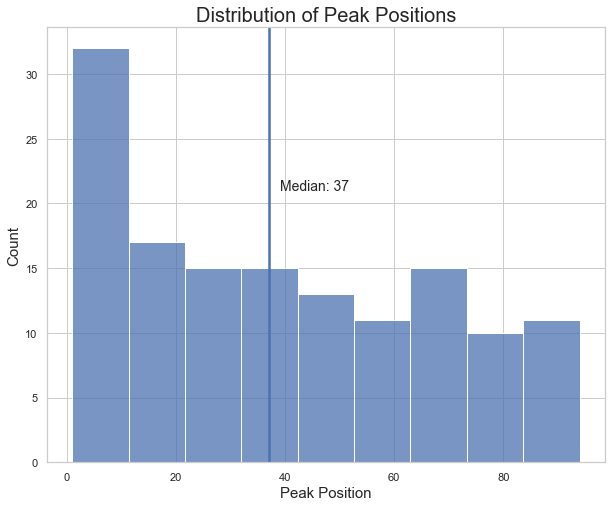

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (10,8))
peak_pos = list(merged['peak_position'])
peak_pos = [int(pos) for pos in peak_pos if not pd.isna(pos)]
ax = sns.histplot(data = peak_pos, palette="Purples")
median = np.median(peak_pos)
ax.axvline(x=median, ls='-', lw=2.5)
plt.text(median+2,21,f"Median: {str(int(median))}", size=14)
plt.xlabel("Peak Position", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Distribution of Peak Positions", fontsize = 20);

In [34]:
billboard_rating = []
for pos in merged['peak_position']:
    if pd.isna(pos):
        billboard_rating.append(0) # not on billboard (not successful)
    elif int(pos) > median:
        billboard_rating.append(1) # above median on billboard (somewhat successful)
    else:
        billboard_rating.append(2) # below median on billboard (very successful)
merged['billboard_rating'] = billboard_rating
merged

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,...,loudness,speechiness,valence,tempo,lyric,debut_date,peak_position,peak_date,weeks_on_chart,billboard_rating
0,tim mcgraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.57500,0.491,0.000000,...,-6.462,0.0251,0.425,76.009,He said the way my blue eyes shined Put those ...,09.23.06,40,01.13.07,20,1
1,picture to burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.17300,0.877,0.000000,...,-2.098,0.0323,0.821,105.586,"State the obvious, I didn't get my perfect fan...",03.01.08,28,05.17.08,20,2
2,a place in this world,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.05100,0.777,0.000000,...,-2.881,0.0324,0.428,115.028,"I don't know what I want, so don't ask me 'Cau...",NaN,NaN,NaN,NaN,0
3,cold as you,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.21700,0.482,0.000000,...,-5.769,0.0266,0.261,175.558,You have a way of coming easily to me And when...,NaN,NaN,NaN,NaN,0
4,the outside,Taylor Swift,Taylor Swift,2006-10-24,207106,47,0.589,0.00491,0.805,0.000000,...,-4.055,0.0293,0.591,112.982,I didn't know what I would find When I went lo...,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,the great war,Midnights (3am Edition),Taylor Swift,2022-10-21,240355,86,0.573,0.21900,0.741,0.000022,...,-8.987,0.0353,0.554,96.016,The Great War Lyrics My knuckles were bruised ...,11.05.22,26,11.05.22,4,2
165,bigger than the whole sky,Midnights (3am Edition),Taylor Swift,2022-10-21,218502,85,0.422,0.82600,0.235,0.006480,...,-12.379,0.0568,0.068,165.710,Bigger Than The Whole Sky Lyrics No words appe...,11.05.22,21,11.05.22,4,2
166,paris,Midnights (3am Edition),Taylor Swift,2022-10-21,196258,85,0.700,0.11200,0.509,0.000033,...,-10.547,0.0789,0.345,110.947,"Paris Lyrics Your ex-friend's sister,2\nMidnig...",11.05.22,32,11.05.22,3,2
167,high infidelity,Midnights (3am Edition),Taylor Swift,2022-10-21,231475,84,0.646,0.72300,0.529,0.000000,...,-10.179,0.0864,0.755,87.862,High Infidelity Lyrics I didn't know you were ...,11.05.22,33,11.05.22,3,2


In [35]:
# Sort dataset by date
merged = merged.sort_values(by = 'release_date')
merged

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,...,loudness,speechiness,valence,tempo,lyric,debut_date,peak_position,peak_date,weeks_on_chart,billboard_rating
0,tim mcgraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.57500,0.491,0.000000,...,-6.462,0.0251,0.4250,76.009,He said the way my blue eyes shined Put those ...,09.23.06,40,01.13.07,20,1
12,a perfectly good heart,Taylor Swift,Taylor Swift,2006-10-24,220146,46,0.483,0.00349,0.751,0.000000,...,-5.726,0.0365,0.2680,156.092,Why would you wanna break a perfectly good hea...,NaN,NaN,NaN,NaN,0
11,invisible,Taylor Swift,Taylor Swift,2006-10-24,203226,48,0.612,0.63700,0.394,0.000000,...,-5.723,0.0243,0.2330,96.001,She can't see the way your eyes Light up when ...,NaN,NaN,NaN,NaN,0
9,our song,Taylor Swift,Taylor Swift,2006-10-24,201106,54,0.668,0.11100,0.672,0.000000,...,-4.931,0.0303,0.5390,89.011,I was ridin' shotgun with my hair undone In th...,10.13.07,16,01.19.08,36,2
8,mary's song,Taylor Swift,Taylor Swift,2006-10-24,213080,50,0.403,0.01770,0.627,0.000000,...,-5.280,0.0292,0.3740,74.900,"She said, I was seven and you were nine I look...",NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,snow on the beach,Midnights (3am Edition),Taylor Swift,2022-10-21,256124,85,0.659,0.73500,0.323,0.003210,...,-13.425,0.0436,0.1540,110.007,Snow On the Beach Lyrics I saw flecks of what ...,11.05.22,4,11.05.22,6,2
153,lavender haze,Midnights (3am Edition),Taylor Swift,2022-10-21,202395,86,0.735,0.20400,0.444,0.001200,...,-10.519,0.0684,0.0984,97.038,Lavender Haze Lyrics Meet me at midnight Stari...,11.05.22,2,11.05.22,6,2
167,high infidelity,Midnights (3am Edition),Taylor Swift,2022-10-21,231475,84,0.646,0.72300,0.529,0.000000,...,-10.179,0.0864,0.7550,87.862,High Infidelity Lyrics I didn't know you were ...,11.05.22,33,11.05.22,3,2
159,bejeweled,Midnights (3am Edition),Taylor Swift,2022-10-21,194165,86,0.700,0.06610,0.550,0.000102,...,-9.130,0.0653,0.4120,164.003,Bejeweled Lyrics Didn't notice you walkin' all...,11.05.22,6,11.05.22,6,2


In [36]:
remove = (merged[merged['name'].duplicated()]).index.values
merged = merged.drop(merged.index[remove])
merged = merged.reset_index()
merged = merged.drop(["index"],axis=1)
merged

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,...,loudness,speechiness,valence,tempo,lyric,debut_date,peak_position,peak_date,weeks_on_chart,billboard_rating
0,tim mcgraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.57500,0.491,0.000000,...,-6.462,0.0251,0.4250,76.009,He said the way my blue eyes shined Put those ...,09.23.06,40,01.13.07,20,1
1,a perfectly good heart,Taylor Swift,Taylor Swift,2006-10-24,220146,46,0.483,0.00349,0.751,0.000000,...,-5.726,0.0365,0.2680,156.092,Why would you wanna break a perfectly good hea...,NaN,NaN,NaN,NaN,0
2,invisible,Taylor Swift,Taylor Swift,2006-10-24,203226,48,0.612,0.63700,0.394,0.000000,...,-5.723,0.0243,0.2330,96.001,She can't see the way your eyes Light up when ...,NaN,NaN,NaN,NaN,0
3,our song,Taylor Swift,Taylor Swift,2006-10-24,201106,54,0.668,0.11100,0.672,0.000000,...,-4.931,0.0303,0.5390,89.011,I was ridin' shotgun with my hair undone In th...,10.13.07,16,01.19.08,36,2
4,mary's song,Taylor Swift,Taylor Swift,2006-10-24,213080,50,0.403,0.01770,0.627,0.000000,...,-5.280,0.0292,0.3740,74.900,"She said, I was seven and you were nine I look...",NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,snow on the beach,Midnights (3am Edition),Taylor Swift,2022-10-21,256124,85,0.659,0.73500,0.323,0.003210,...,-13.425,0.0436,0.1540,110.007,Snow On the Beach Lyrics I saw flecks of what ...,11.05.22,4,11.05.22,6,2
162,lavender haze,Midnights (3am Edition),Taylor Swift,2022-10-21,202395,86,0.735,0.20400,0.444,0.001200,...,-10.519,0.0684,0.0984,97.038,Lavender Haze Lyrics Meet me at midnight Stari...,11.05.22,2,11.05.22,6,2
163,high infidelity,Midnights (3am Edition),Taylor Swift,2022-10-21,231475,84,0.646,0.72300,0.529,0.000000,...,-10.179,0.0864,0.7550,87.862,High Infidelity Lyrics I didn't know you were ...,11.05.22,33,11.05.22,3,2
164,bejeweled,Midnights (3am Edition),Taylor Swift,2022-10-21,194165,86,0.700,0.06610,0.550,0.000102,...,-9.130,0.0653,0.4120,164.003,Bejeweled Lyrics Didn't notice you walkin' all...,11.05.22,6,11.05.22,6,2


In [37]:
merged.to_csv('data/merged.csv')

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer

In [39]:
porter = PorterStemmer()
merged['lyric_stemmed'] = ""
for i, song in enumerate(merged['lyric']):
    merged.loc[i, 'lyric_stemmed'] = " ".join([porter.stem(word) for word in song.split()])

In [40]:
# TFIDF Vectorization of lyrics
v = TfidfVectorizer(stop_words = 'english') # stop words
x = v.fit_transform(merged['lyric_stemmed'])

tfidf_df = pd.DataFrame(x.toarray(), index = merged['name'], columns= v.get_feature_names_out())
tfidf_df

,15,16,16th,17,18,1950,20,2003,22,29th,...,years,yell,yes,yesterday,yeugh,yogurt,york,young,younger,youyou
name,,,,,,,,,,,,,,,,,,,,,
tim mcgraw,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a perfectly good heart,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
invisible,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
our song,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mary's song,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snow on the beach,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lavender haze,0.0,0.0,0.0,0.0,0.0,0.183486,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
high infidelity,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.201775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
tfidf_df.to_csv('data/tfidf_embedding.csv', index= True)